# Otomobil Fiyat Tahminleme Projesi

Bu proje, aşağıda tanımlanan değişkenlerden yararlanılarak, çeşitli özellikleri verilen ikinci el bir otomobilin satış fiyatını hesaplayabilmeyi hedeflemektedir.

## Değişkenlerin Tanımlanması

* symboling: sigorta risk değeri. (-3) en risksiz, (+3) en riskli değerdir
* normalised-losses: tanımlanan her araç grubu için, araç grubundaki diğer araçlara göre sigorta kayıp ödemesi ortalaması
* make: marka
* fuel-type: kullandığı yakıt tipi
* aspiration: emisyon
* num-of-doors: kapı sayısı
* body-style: gövde
* drive-wheels: motor dişlisi
* engine-location: motor yeri
* wheel-base: tekerlekler arası mesafe
* length: uzunluk
* width: genişlik
* height: yükseklik
* curb-weight: yüksüz ağırlık
* engine-type: motor tipi
* num-of-cylinders: silindir sayısı
* engine-size: motor hacmi
* fuel-system: yakın sistemi
* bore: silindir çapı
* stroke: strok
* compression-ratio: sıkıştırma oranı
* horsepower: beygir gücü
* peak-rpm: en yüksek motor devri
* city-mpg: şehir içinde harcadığı galon yakıt başına mil
* highway-mpg: otoyolda  harcadığı galon yakıt başına mil
* price: fiyat

## Kullanılan Kütüphanelerin ve Verilerin Yüklenmesi

In [1]:
## Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score ,mean_absolute_error ,mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
import seaborn as sns

filterwarnings('ignore')

## Verilerin Yüklenmesi


In [2]:
df = pd.read_csv("automobile.csv",sep=",")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Veriyi daha iyi tanıyabilmek adına, değişkenlerin istatistiksel ve benzersiz değerleri incelendi.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,202.0,0.831683,1.258360,-2.0,0.000,1.0,2.000,3.0
normalized-losses,165.0,121.836364,35.396412,65.0,94.000,115.0,150.000,256.0
wheel-base,202.0,98.848020,6.094523,86.6,94.500,97.0,102.400,120.9
length,202.0,174.273267,12.334330,141.1,166.800,173.2,183.500,208.1
width,202.0,65.903960,2.106915,60.3,64.125,65.5,66.825,72.0
height,202.0,53.775248,2.444769,47.8,52.000,54.1,55.500,59.8
curb-weight,202.0,2558.173267,517.236654,1488.0,2174.250,2417.0,2932.750,4066.0
engine-size,202.0,126.945545,41.455269,61.0,98.000,120.0,141.000,326.0
compression-ratio,202.0,10.160990,3.995264,7.0,8.600,9.0,9.400,23.0
city-mpg,202.0,25.148515,6.421956,13.0,19.000,24.0,30.000,49.0


Kategorik değişkenlerin istatistiki bilgileri nelerdir?

In [4]:
df.describe(include="O").T

,count,unique,top,freq
make,202,22,toyota,32
fuel-type,202,2,gas,182
aspiration,202,2,std,165
num-of-doors,200,2,four,114
body-style,202,5,sedan,95
drive-wheels,202,3,fwd,118
engine-location,202,2,front,199
engine-type,202,6,ohc,146
num-of-cylinders,202,7,four,158
fuel-system,202,8,mpfi,93


Verideki boş değerler incelendi ve silindi. 

In [5]:
df.isnull().sum().sort_values(ascending=False)

normalized-losses    37
num-of-doors          2
symboling             0
engine-type           0
highway-mpg           0
city-mpg              0
peak-rpm              0
horsepower            0
compression-ratio     0
stroke                0
bore                  0
fuel-system           0
engine-size           0
num-of-cylinders      0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
price                 0
dtype: int64

In [6]:
df.dropna(inplace=True)

Bore, stroke, horsepower ve peak-rpm değişkenlerinde bulunan "?" değerleri "0" değeri ile değiştirildi. Bore ve stroke değişkenleri ondalıklı, horsepower ve peak-rpm değişkenleri tamsayı yapılarına dönüştürüldü.

In [7]:
df.bore.replace("?",0,inplace=True)
df.bore = df.bore.values.astype(float)

In [8]:
df.stroke.replace("?",0,inplace=True)
df.stroke = df.stroke.values.astype(float)

In [9]:
df.horsepower.replace("?",0,inplace=True)
df.horsepower = df.horsepower.values.astype(int)

In [10]:
df["peak-rpm"].replace("?",0,inplace=True)
df["peak-rpm"] = df["peak-rpm"].values.astype(int)

Temizleme işlemi sonrasında veriler yeniden incelendi.

In [11]:
df.describe(include="O").T

,count,unique,top,freq
make,164,18,toyota,31
fuel-type,164,2,gas,149
aspiration,164,2,std,136
num-of-doors,164,2,four,96
body-style,164,5,sedan,80
drive-wheels,164,3,fwd,105
engine-location,164,1,front,164
engine-type,164,6,ohc,124
num-of-cylinders,164,6,four,137
fuel-system,164,7,mpfi,66


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,164.0,0.780488,1.233722,-2.0,0.0000,1.000,2.00,3.00
normalized-losses,164.0,121.676829,35.445272,65.0,94.0000,115.000,150.00,256.00
wheel-base,164.0,98.257927,5.178708,86.6,94.5000,96.750,100.60,115.60
length,164.0,172.430488,11.429938,141.1,166.1500,172.000,177.80,202.60
width,164.0,65.629878,1.934960,60.3,64.0000,65.400,66.50,71.70
height,164.0,53.804268,2.334441,49.4,52.0000,54.100,55.50,59.80
curb-weight,164.0,2463.585366,476.945688,1488.0,2090.7500,2371.000,2808.75,4066.00
engine-size,164.0,118.219512,30.908344,61.0,97.0000,109.500,134.50,258.00
bore,164.0,3.222561,0.576103,0.0,3.0500,3.255,3.55,3.94
stroke,164.0,3.156890,0.578804,0.0,3.0775,3.270,3.41,4.17


Korelasyon derecesi, bağımlı ve bağımsız değişken arasındaki ilişkinin gücünü açıklamaktadır. İncelediğimiz değişken olan fiyat (price) değişkeninin diğer değişkenler ile arasındaki korelasyon incelendi. En yüksek aynı yönlü ilişkinin ağırlık (curb-weight), genişlik (width), uzunluk (length) gibi aracın fiziksel özellikleri ile birlikte motor hacmi (engine-size), beygir gücü (horsepower) gibi gücü etkileyen değişkenler ile olduğu görüldü. En yüksek negatif yönlü ilişki ise fiyat ile aracın şehir içi ve otoyoldaki galon başı mil yakıt harcaması (city-mpg, highway-mpg) değişkenleri arasındadır.

In [13]:
df.corr()["price"].sort_values(ascending=False)

price                1.000000
curb-weight          0.892036
width                0.844927
engine-size          0.805552
length               0.760173
horsepower           0.757889
wheel-base           0.732755
height               0.227829
bore                 0.215184
compression-ratio    0.203282
normalized-losses    0.194617
stroke               0.043461
peak-rpm            -0.144119
symboling           -0.157994
city-mpg            -0.683804
highway-mpg         -0.712669
Name: price, dtype: float64

Fiyat ile en yüksek aynı yönlü korelasyon değerine sahip yüksüz ağırlık (curb-weight) değişkeni arasındaki dağılım grafiği çizildi.

<AxesSubplot:xlabel='price', ylabel='curb-weight'>

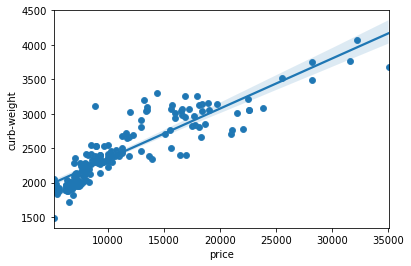

In [14]:
sns.scatterplot(data=df,x="price",y="curb-weight")
sns.regplot(data=df,x="price",y="curb-weight")

Kategorik değişkenlerin histogramları çizildi.

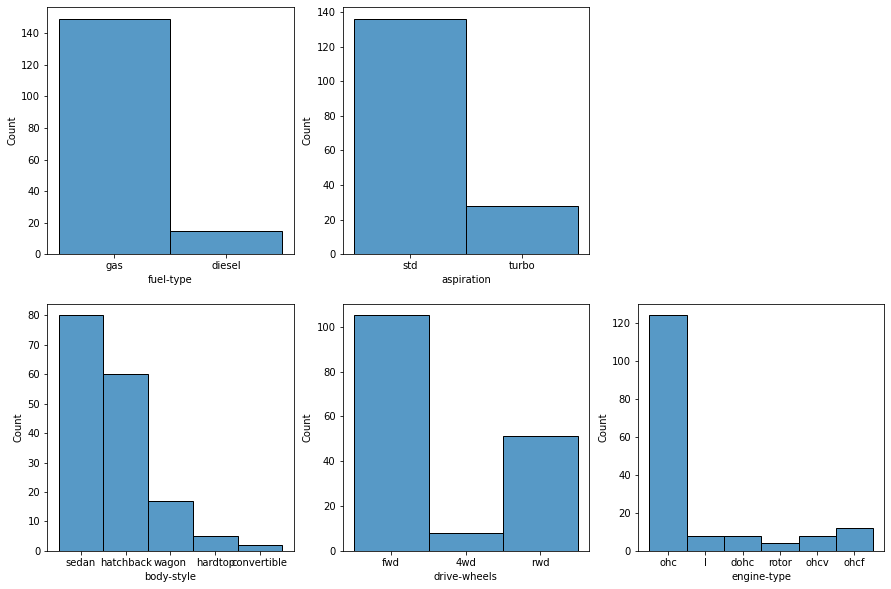

In [15]:
plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
sns.histplot(df["fuel-type"],bins=2)
plt.subplot(2,3,2)
sns.histplot(df["aspiration"],bins=2)
plt.subplot(2,3,4)
sns.histplot(df["body-style"],bins=5)
plt.subplot(2,3,5)
sns.histplot(df["drive-wheels"],bins=3)
plt.subplot(2,3,6)
sns.histplot(df["engine-type"],bins=6)
plt.show()

En pahalı 5 araba markası nedir?

In [16]:
df.groupby(by="make").price.mean().sort_values(ascending=False).head(5)

make
jaguar           32250.000000
mercedes-benz    29726.400000
porsche          22018.000000
bmw              18857.500000
volvo            18443.333333
Name: price, dtype: float64

Veri setindeki en fazla satılan 5 araç nedir?

In [17]:
df.make.value_counts().head()

toyota    31
nissan    18
mazda     15
honda     13
subaru    12
Name: make, dtype: int64

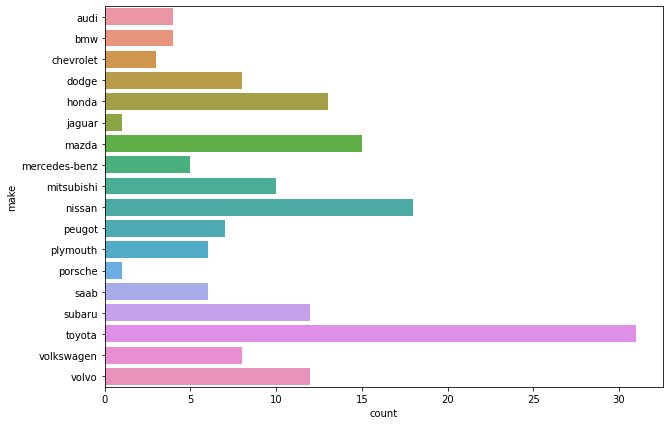

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(y=df["make"])
plt.show()

En fazla satılan araç stili nedir?

In [19]:
df["body-style"].value_counts().sort_values(ascending=False)

sedan          80
hatchback      60
wagon          17
hardtop         5
convertible     2
Name: body-style, dtype: int64

Hangi marka araçtan kaçar adet satılmış?

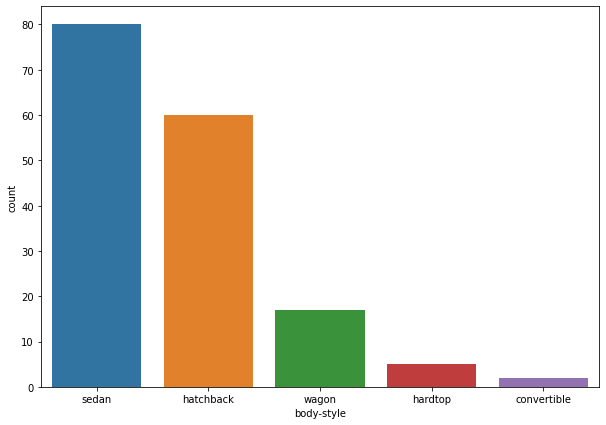

In [20]:
plt.figure(figsize=(10,7))
sns.countplot(df['body-style'])
plt.show()

### Aykırı Değişkenlerin Box Plot Yöntemi ile Belirlenmesi

Aykırı değerler (outlier), diğer değerlerle karşılaştırıldığında veri setine uygun olmayan değerlerdir. Bu değerlerin fazla olması, veri setinin normal dağılımdan sapmasına, bu nedenle elde edilen istatistiksel sonuçlarda farklılıklara neden olabilmektedir.

Q1 (1. kartil): Değerlerin %25'inin başladığı sınır 
Q3 (3. kartil): Değerlerin %75'inin başladığı sınır 
IQR: kartiller arası genişlik değeri

IQR değeri kullanılarak alt ve üst sınırlar belirlenir. Bu sınırların dışında kalan değerler, aykırı değerlerdir.

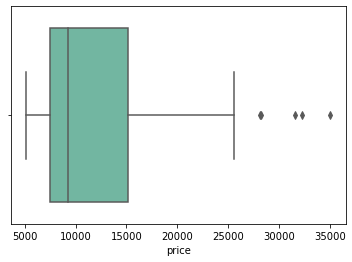

In [21]:
sns.boxplot(df["price"], orient = 'v',palette="Set2")
plt.show()

In [22]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3-Q1
alt_sinir = Q1 -1.5*IQR
üst_sinir = Q3 +1.5*IQR

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"Alt Sınır = {alt_sinir}")
print(f"Üst Sınır = {üst_sinir}")

Q1 = 7446.0
Q3 = 15157.5
Alt Sınır = -4121.25
Üst Sınır = 26724.75


In [23]:
df[df.price > üst_sinir]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
44,0,145.0,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250
65,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
66,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
69,3,142.0,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056


Daha kolay inceleyebilmek adına, object (string) formatındaki veriler ile sayısal formattaki veriler ayrı ayrı tablolar haline getirildi.

### Kategorik değişkenlerin bir grupta toplanılması

In [24]:
dfobject = df.drop(["symboling","normalized-losses","wheel-base","length","width","height","curb-weight","engine-size","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"],axis=1)
dfobject.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
6,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
8,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
9,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi


### Nümerik değişkenlerin bir grupta toplanılması

In [25]:
dfint = df[["symboling","normalized-losses","wheel-base","length","width","height","curb-weight","engine-size","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]]
dfint.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158.0,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158.0,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140,5500,17,20,23875
9,2,192.0,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101,5800,23,29,16430


### Label Encoder

Kategorik değişkenlere sayısal değerler atandı.

In [26]:
import xlsxwriter
import math
from xlsxwriter.utility import xl_range

labelsMatrix = list()


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

categoryFieldsList = ['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
for item in categoryFieldsList:
    dfobject[item] = encoder.fit_transform(dfobject[item])
    print(f"Kolon adı {item} olan değişken için")
    label_value_matrix = []
    for id_, class_ in enumerate(encoder.classes_):
        if isinstance(class_, float) and math.isnan(class_):
            class_ = "NONE"
        print(f"'{class_}' sınıfına verilen numerik değer '{id_}' olarak belirlenmiştir")
        label_value_matrix.append([class_,id_])
    labelsMatrix.append(pd.DataFrame(label_value_matrix, columns=['label','value']))
    print(" ")
    
writer = pd.ExcelWriter('ITU_Project_Mappings.xlsx', engine='xlsxwriter')
print(len(categoryFieldsList))
for i in range(0,len(categoryFieldsList)-1):
    workbook = writer.book
    labelsMatrix[i].to_excel(
        writer, 
        categoryFieldsList[i],
        startcol=0,
        startrow=0
    )
writer.close()

Kolon adı make olan değişken için
'audi' sınıfına verilen numerik değer '0' olarak belirlenmiştir
'bmw' sınıfına verilen numerik değer '1' olarak belirlenmiştir
'chevrolet' sınıfına verilen numerik değer '2' olarak belirlenmiştir
'dodge' sınıfına verilen numerik değer '3' olarak belirlenmiştir
'honda' sınıfına verilen numerik değer '4' olarak belirlenmiştir
'jaguar' sınıfına verilen numerik değer '5' olarak belirlenmiştir
'mazda' sınıfına verilen numerik değer '6' olarak belirlenmiştir
'mercedes-benz' sınıfına verilen numerik değer '7' olarak belirlenmiştir
'mitsubishi' sınıfına verilen numerik değer '8' olarak belirlenmiştir
'nissan' sınıfına verilen numerik değer '9' olarak belirlenmiştir
'peugot' sınıfına verilen numerik değer '10' olarak belirlenmiştir
'plymouth' sınıfına verilen numerik değer '11' olarak belirlenmiştir
'porsche' sınıfına verilen numerik değer '12' olarak belirlenmiştir
'saab' sınıfına verilen numerik değer '13' olarak belirlenmiştir
'subaru' sınıfına verilen numer

Tablolar yeniden birleştirilerek tek veri seti haline getirildi.

In [27]:
df_new = pd.concat([dfobject,dfint],axis=1)
df_new.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,0,1,0,0,3,1,0,2,2,5,...,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
4,0,1,0,0,3,0,0,2,1,5,...,2824,136,3.19,3.4,8.0,115,5500,18,22,17450
6,0,1,0,0,3,1,0,2,1,5,...,2844,136,3.19,3.4,8.5,110,5500,19,25,17710
8,0,1,1,0,3,1,0,2,1,5,...,3086,131,3.13,3.4,8.3,140,5500,17,20,23875
9,1,1,0,1,3,2,0,2,2,5,...,2395,108,3.50,2.8,8.8,101,5800,23,29,16430


In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 3 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               164 non-null    int32  
 1   fuel-type          164 non-null    int32  
 2   aspiration         164 non-null    int32  
 3   num-of-doors       164 non-null    int32  
 4   body-style         164 non-null    int32  
 5   drive-wheels       164 non-null    int32  
 6   engine-location    164 non-null    int32  
 7   engine-type        164 non-null    int32  
 8   num-of-cylinders   164 non-null    int32  
 9   fuel-system        164 non-null    int32  
 10  symboling          164 non-null    int64  
 11  normalized-losses  164 non-null    float64
 12  wheel-base         164 non-null    float64
 13  length             164 non-null    float64
 14  width              164 non-null    float64
 15  height             164 non-null    float64
 16  curb-weight        164 non

## Bağımlı ve Bağımsız Değişkenlerin Ayrılması

In [29]:
x = df_new.iloc[:,0:25]
y = df_new["price"]
x = sm.add_constant(x)

## İstatistiksel Model - 1

Modelimizi son haline getirirken "price" değerine etki etmeyen veya etkisi az olan parametrelerin çıkartılması gerekmektedir. 
Bütün parametrelerin olduğu bir model oluşturup, bu modelden  "p" değeri "0,05"in üstünde olanları çıkartacağız.
"p" değeri "0,05"in üstünde herhangi bir değer kalmadığında bu bizim öğrenme modellerimizi için kullanacağımız veri seti olacaktır.

In [30]:
lm = sm.OLS(y,x)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     52.52
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           7.16e-58
Time:                        21:31:14   Log-Likelihood:                -1465.8
No. Observations:                 164   AIC:                             2982.
Df Residuals:                     139   BIC:                             3059.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.868e+04   1.54e+04     -3.166      0.002   -7.91e+04   -1.83e+04
make               -217.2096     45.518     -4.772      0.000    -307.207    -127.213
fuel-type          2.314e+04   5673.477      4.079      0.000    1.19e+04    3.44e+04
aspiration         3178.8377    811.356      3.918      0.000    1574.643    4783.032
num-of-doors       -428.9646    556.143     -0.771      0.442   -1528.558     670.628
body-style         -118.2769    347.910     -0.340      0.734    -806.157     569.604
drive-wheels        955.2269    512.422      1.864      0.064     -57.922    1968.376
engine-location   -6.237e-10   2.08e-10     -2.993      0.003   -1.04e-09   -2.12e-10
engine-type        -502.7004    319.055     -1.576      0.117   -1133.529     128.129
num-of-cylinders  -2325.6717    528.715     -4.399      0.000   -3371.035   -1280.308
fuel-system         253.4348    134.405      1.886      0.061     -12.307     519.177
symboling          -168.9680    265.194     -0.637      0.525    -693.304     355.368
normalized-losses     3.9537      7.346      0.538      0.591     -10.570      18.478
wheel-base           66.6298    110.926      0.601      0.549    -152.690     285.950
length              -65.2765     44.636     -1.462      0.146    -153.531      22.978
width               251.3767    240.992      1.043      0.299    -225.108     727.861
height              120.1043    123.662      0.971      0.333    -124.397     364.605
curb-weight           4.4754      1.461      3.063      0.003       1.586       7.364
engine-size          90.0103     24.200      3.719      0.000      42.163     137.857
bore              -1127.6287    658.905     -1.711      0.089   -2430.402     175.144
stroke            -2985.0521    688.974     -4.333      0.000   -4347.277   -1622.828
compression-ratio  1709.5533    417.632      4.093      0.000     883.820    2535.287
horsepower           10.2005     21.887      0.466      0.642     -33.074      53.475
peak-rpm             -0.1092      0.586     -0.186      0.852      -1.268       1.049
city-mpg           -107.9522    140.651     -0.768      0.444    -386.044     170.140
highway-mpg         101.8166    126.252      0.806      0.421    -147.805     351.438
==============================================================================
Omnibus:                        3.597   Durbin-Watson:                   1.151
Prob(Omnibus):                  0.166   Jarque-Bera (JB):                4.266
Skew:                           0.012   Prob(JB):                        0.118
Kurtosis:                       3.790   Cond. No.                     1.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smalles

Least Squares (en küçük kareler) yöntemi kullanılarak, değişkenlerin kovaryans dereceleri ölçüldü. Anlamlılık düzeyi 0.05'in üzerinde olan değerler veri setinden çıkarıldı.

In [31]:
x = df_new.iloc[:,0:25]
x = x.drop(["peak-rpm","horsepower","body-style","symboling","normalized-losses","wheel-base","num-of-doors","city-mpg","highway-mpg","length","width","height","bore","engine-type"],axis=1)
y = df_new["price"]
x = sm.add_constant(x)

## İstatistiksel Model - 2

In [32]:
lm = sm.OLS(y,x)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     126.6
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           1.04e-68
Time:                        21:31:14   Log-Likelihood:                -1472.5
No. Observations:                 164   AIC:                             2967.
Df Residuals:                     153   BIC:                             3001.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.644e+04   8397.177     -4.340      0.000    -5.3e+04   -1.99e+04
make               -256.6695     34.456     -7.449      0.000    -324.740    -188.599
fuel-type          2.211e+04   4817.307      4.590      0.000    1.26e+04    3.16e+04
aspiration         3135.2139    609.403      5.145      0.000    1931.283    4339.145
drive-wheels       1370.7277    379.642      3.611      0.000     620.711    2120.744
engine-location   -2.242e-11   4.44e-12     -5.054      0.000   -3.12e-11   -1.37e-11
num-of-cylinders  -1987.5014    358.120     -5.550      0.000   -2695.001   -1280.002
fuel-system         252.4968    107.234      2.355      0.020      40.646     464.348
curb-weight           6.2675      0.921      6.807      0.000       4.448       8.087
engine-size          65.1643     13.763      4.735      0.000      37.975      92.354
stroke            -2571.4935    450.320     -5.710      0.000   -3461.141   -1681.846
compression-ratio  1643.4006    350.499      4.689      0.000     950.959    2335.842
==============================================================================
Omnibus:                        2.808   Durbin-Watson:                   1.086
Prob(Omnibus):                  0.246   Jarque-Bera (JB):                2.768
Skew:                          -0.098   Prob(JB):                        0.251
Kurtosis:                       3.605   Cond. No.                     2.31e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.94e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Veri setinin kovaryansı, yine en küçük kareler yöntemi ile incelendi. Regresyon derecesinin değişkenler çıkarıldıktan sonra anlamlı düzeyde değişmediği, böylece kalan değişkenlerin veri setini kayıpsız tanımlayabildiği görüldü.

In [33]:
x = df_new.iloc[:,0:25]
x = x.drop(["peak-rpm","horsepower","body-style","symboling","normalized-losses","wheel-base","num-of-doors","city-mpg","highway-mpg","length","width","height","bore"],axis=1)
y = df_new["price"]

## Test ve Train Veri Setlerinin Oluşturulması

Tahminleme aşamasına geçerken, veri setinin %80'i modelin training verisi olarak, %20'si test verisi olarak kullanılmak üzere, veri seti iki gruba ayrıldı.

In [34]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20,random_state=0)

## StandarScaler

Veriler standardize edildi.

In [35]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)
#sc.inverse_transform()

## Çoklu Doğrusal Regresyon

Amaç bağımsız değişkenler kullanılarak bağımlı fiyat değişkenini tahminlemek olduğundan, öncelikle çoklu doğrusal regresyon modeli kuruldu.

R-kare değeri, bir değişkenin varyansının ikinci değişkenin varyansını ne ölçüde açıkladığını belirtir. Daha yüksek bir R-kare değeri, girdi değişkenlerinin daha fazla varyasyonu açıklayabildiği anlamına gelmektedir.

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

print(f"Training R^2={regressor.score(X_train,y_train).round(3)}")
print(f"Test R^2={r2_score(y_test,regressor.predict(X_test)).round(3)}")
print(f"Test MAE={mean_absolute_error(y_test,regressor.predict(X_test)).round(3)}")
print(f"Test MSE={mean_squared_error(y_test,regressor.predict(X_test)).round(3)}")

Training R^2=0.897
Test R^2=0.762
Test MAE=2100.807
Test MSE=7850790.057


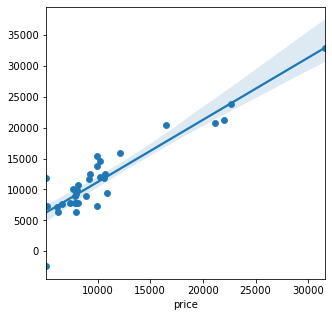

In [37]:
plt.figure(figsize=(5,5))
sns.scatterplot(y_test,regressor.predict(X_test))
sns.regplot(y_test,regressor.predict(X_test))
plt.show()

Cross-validation veya “k-fold cross validation”, veri kümesinin rastgele 'k' tane gruba ayrılması ve yeniden test edilmesi işlemidir. Bu işlemin amacı, makine öğrenmesi modelinin görmediği verileri de yeniden test ederek, modelin performansını mümkün olduğunca objektif ve doğru bir şekilde değerlendirmektir.

Cross-validation aşaması için, veri seti %10'luk dilimlere bölündü. Her aşamada bu gruplardan biri test seti olarak kullanılırken, diğer gruplar training seti olarak kullanıldı. Bu işlem her bir grup için tekrarlanarak model eğitildi ve diğer gruplar kullanılarak test edildi. 

In [38]:
print("R^2 = "+str(cross_val_score(regressor, X_train, y_train, cv=10, scoring="r2").mean().round(3)))
print("MAE = "+str(-cross_val_score(regressor, X_train, y_train, cv=10, scoring="neg_mean_absolute_error").mean().round(3)))
print("MSE = "+str(-cross_val_score(regressor, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean().round(3)))

R^2 = 0.79
MAE = 1680.155
MSE = 4913490.397


## GradientBoostingRegressor

Gradient boosting regressor, zayıf tahmin modelleri bir araya getirilerek güçlü bir tahmin modelinin ortaya çıkarılmasını, böylelikle hedef değişkenini daha iyi tahminlemeyi amaçlayan bir makine öğrenimi tekniğidir. 

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

print(f"Training R^2={gbr.score(X_train,y_train).round(3)}")
print(f"Test R^2={r2_score(y_test,gbr.predict(X_test)).round(3)}")
print(f"Test MAE={mean_absolute_error(y_test,gbr.predict(X_test)).round(3)}")
print(f"Test MSE={mean_squared_error(y_test,gbr.predict(X_test)).round(3)}")

Training R^2=0.993
Test R^2=0.856
Test MAE=1646.012
Test MSE=4752514.529


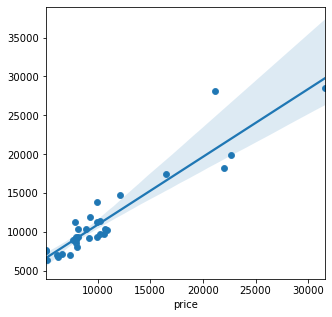

In [40]:
plt.figure(figsize=(5,5))
sns.scatterplot(y_test,gbr.predict(X_test))
sns.regplot(y_test,gbr.predict(X_test))
plt.show()

In [41]:
print("R^2 = "+str(cross_val_score(gbr, X_train, y_train, cv=10, scoring="r2").mean().round(3)))
print("MAE = "+str(-cross_val_score(gbr, X_train, y_train, cv=10, scoring="neg_mean_absolute_error").mean().round(3)))
print("MSE = "+str(-cross_val_score(gbr, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean().round(3)))

R^2 = 0.834
MAE = 1415.495
MSE = 4391687.861


## Rassal Ağaçlar

Rassal ağaçlar yöntemi, veri kümesinin çeşitli alt örneklerinde, bir dizi sınıflandırma karar ağacına uyan bir tahmin edicidir. Tahmin doğruluğunu iyileştirmek ve aşırı uydurmayı (overfitting) kontrol etmek için ortalamayı kullanır. Aksi belirtilmedikçe, alt örnek boyutundaki her bir ağacı oluşturmak için tüm veri seti kullanılır.

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=0)
rf_reg.fit(X_train,y_train)

print(f"Training R^2={rf_reg.score(X_train,y_train).round(3)}")
print(f"Test R^2={r2_score(y_test,rf_reg.predict(X_test)).round(3)}")
print(f"Test MAE={mean_absolute_error(y_test,rf_reg.predict(X_test)).round(3)}")
print(f"Test MSE={mean_squared_error(y_test,rf_reg.predict(X_test)).round(3)}")

Training R^2=0.98
Test R^2=0.86
Test MAE=1703.181
Test MSE=4621726.626


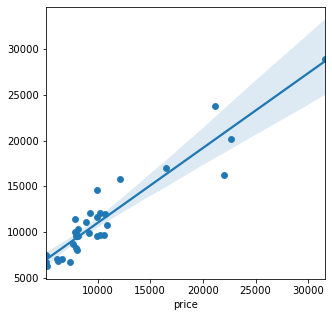

In [43]:
plt.figure(figsize=(5,5))
sns.scatterplot(y_test,rf_reg.predict(X_test))
sns.regplot(y_test,rf_reg.predict(X_test))
plt.show()

In [44]:
print("R^2 = "+str(cross_val_score(rf_reg, X_train, y_train, cv=10, scoring="r2").mean().round(3)))
print("MAE = "+str(-cross_val_score(rf_reg, X_train, y_train, cv=10, scoring="neg_mean_absolute_error").mean().round(3)))
print("MSE = "+str(-cross_val_score(rf_reg, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean().round(3)))

R^2 = 0.812
MAE = 1519.932
MSE = 5321711.991


## XGBRegressor 

XGBoost, Gradient Boosting Regressor tekniği çerçevesinde makine öğrenimi algoritmaları uygulayan, bu tekniğe kıyasla daha yüksek verimli ve esnek olacak şekilde tasarlanarak optimize edilmiş bir kitaplıktır. Model üzerinde daha önce gerçekleştirilen çalışmaları geliştirebilmek adına, ek bir test olarak gerçekleştirilmiştir.

In [45]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

print(f"Training R^2={xgb.score(X_train,y_train).round(3)}")
print(f"Test R^2={r2_score(y_test,xgb.predict(X_test)).round(3)}")
print(f"Test MAE={mean_absolute_error(y_test,xgb.predict(X_test)).round(3)}")
print(f"Test MSE={mean_squared_error(y_test,xgb.predict(X_test)).round(3)}")

Training R^2=1.0
Test R^2=0.91
Test MAE=1414.47
Test MSE=2951649.115


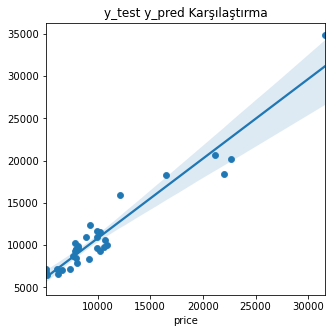

In [46]:
plt.figure(figsize=(5,5))
sns.scatterplot(y_test,xgb.predict(X_test))
sns.regplot(y_test,xgb.predict(X_test))
plt.title("y_test y_pred Karşılaştırma")
plt.show()

In [47]:
print("R^2 = "+str(cross_val_score(xgb, X_train, y_train, cv=10, scoring="r2").mean().round(3)))
print("MAE = "+str(-cross_val_score(xgb, X_train, y_train, cv=10, scoring="neg_mean_absolute_error").mean().round(3)))
print("MSE = "+str(-cross_val_score(xgb, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean().round(3)))

R^2 = 0.817
MAE = 1538.906
MSE = 5055920.037


- $R^{2}$ = Bir değişkenin varyansının ikinci değişkenin varyansını ne ölçüde açıkladığını belirtir. Daha yüksek bir R-kare değeri, girdi değişkenlerinin daha fazla varyasyonu açıklayabildiği anlamına gelmektedir.
- MAE = Ortalama mutlak hata iki sürekli değişken arasındaki farkın ölçüsüdür. MAE, her gerçek değer ile veriye en iyi uyan çizgi arasındaki ortalama dikey mesafedir.
- MSE = ortalama kare hata bir regresyon eğrisinin bir dizi noktaya ne kadar yakın olduğunu söyler.MSE değeri sıfıra yakın olan tahminleyicilerin daha iyi bir performans gösterdiği söylenebilir.

Verilerimizi düzenleyerek dört farklı modelde kullandık.
Bu modellerde $R^{2}$, MAE ve MSE değerlerine bakarak en iyiden en kötüye doğru sıralamamızı yaparsak:

- XGB Regresyon
    - Train $R^{2}$ = (1.0)
    - Test $R^{2}$ = (0.91)
    - Test MAE = (1414.47)
    - Test MSE = (2951649.115)

- Gradyan Artırma Regresörü
    - Train $R^{2}$ = (0.993)
    - Test $R^{2}$ = (0.862)
    - Test MAE = (1613.117)
    - Test MSE = (4544876.624)
    
- Rassal Ağaçlar
    - Train $R^{2}$ = (0.98)
    - Test $R^{2}$ = (0.86)
    - Test MAE = (1703.181)
    - Test MSE = (4621726.626)
    
- Çoklu Doğrusal Regresyon
    - Train $R^{2}$ = (0.897)
    - Test $R^{2}$ = (0.762)
    - Test MAE = (2100.807)
    - Test MSE = (7850790.057) 

Bu sonuçlar neticesinde XGB Regresyon modelimizin en iyi model olduğu sonucuna ulaştık.